In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats
import math


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.api as sm

import pandas_datareader as pdr
from datetime import datetime
import requests
from io import StringIO
import sklearn

In [5]:
df=sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0

In [8]:
df['Had_Affair']=df['affairs'].apply(affair_check)

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


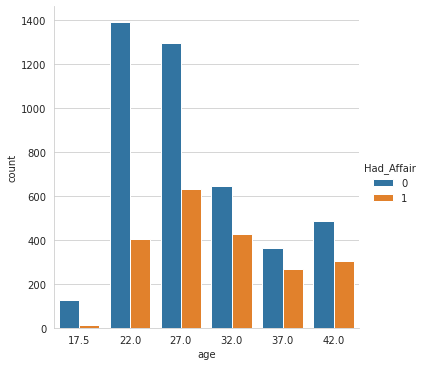

In [11]:
sns.catplot(x='age',data=df,kind='count',hue='Had_Affair')

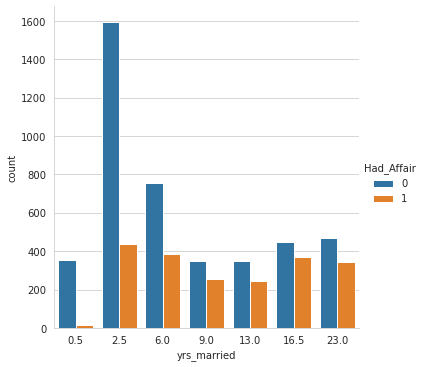

In [12]:
sns.catplot(x='yrs_married',data=df,kind='count',hue='Had_Affair')

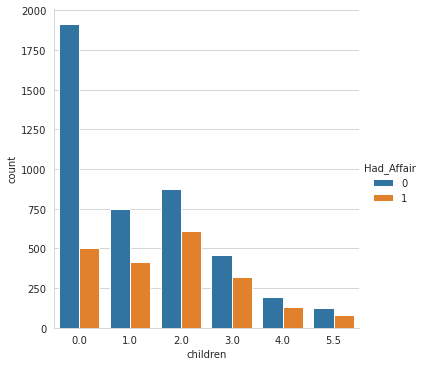

In [13]:
sns.catplot(x='children',data=df,kind='count',hue='Had_Affair')

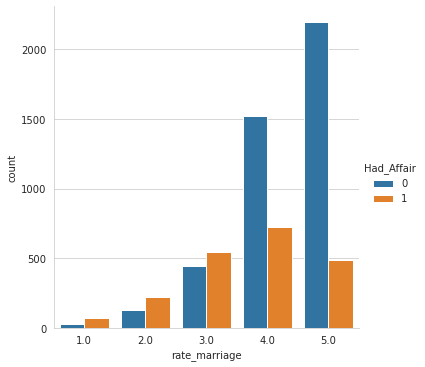

In [15]:
sns.catplot(x='rate_marriage',data=df,kind='count',hue='Had_Affair')

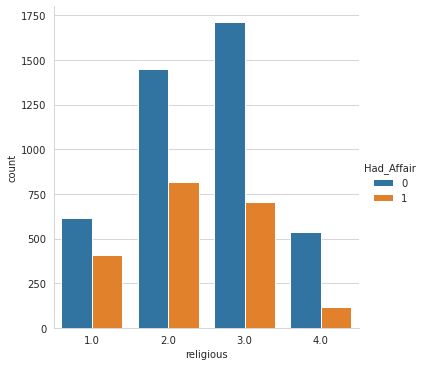

In [16]:
sns.catplot(x='religious',data=df,kind='count',hue='Had_Affair')

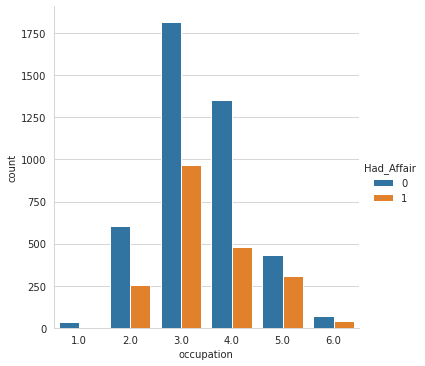

In [20]:
sns.catplot(x='occupation',data=df,kind='count',hue='Had_Affair')

In [17]:
#gets confused and thinks that the occupation is a spectrum rather than a category, so dummies lets us seperate it all out
occ_dummies=pd.get_dummies(df['occupation'])

In [18]:
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [19]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [22]:
#rename columns, so when we recombine this catagorical data into the single dataframe, we know what is what
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [25]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [26]:
hus_occ_dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [27]:
x=df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [28]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [29]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [30]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [31]:
x=pd.concat([x,dummies],axis=1)

In [32]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [33]:
y=df.Had_Affair
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [36]:
#because if you know one one value of the occumpation, you can predict the rest (like if you know occ3 is a 1, then the rest must be 0) you bias the regression. Multicolinearity. If you drop one, you take care of this porblem with the sacrifice of one piece of data
x=x.drop(['occ1','hocc1'],axis=1)

In [37]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [39]:
#we made the had affair column from the affairs column, so it has to go
x=x.drop('affairs',axis=1)

In [40]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [41]:
#for scikitlearn, we need to make y a 1d array
y=np.ravel(y)

In [42]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
#i upped the max itterations to avoid an error. Default is 100
log_model=LogisticRegression(solver='lbfgs',max_iter=1000)

In [50]:
log_model.fit(x,y)
#gives us our accuracy, essentially an r2
log_model.score(x,y)

0.7262016965127238

In [51]:
#percentage of women who had affairs, null error rate
y.mean()

0.3224945020420987

In [52]:
#just saying no all the time gives us an error rate of 68%, so were better, but not awesome


In [53]:
coeff_df=DataFrame(zip(x.columns,np.transpose(log_model.coef_)))

In [54]:
#posative = increased likleyhood of having an affair
coeff_df

,0,1
0,rate_marriage,[-0.7078936595773616]
1,age,[-0.060202228563287476]
2,yrs_married,[0.10706774666230702]
3,children,[0.016440735648898808]
4,religious,[-0.37363169745588004]
5,educ,[-0.00011061224920690055]
6,occ2,[0.20756247394368577]
7,occ3,[0.5202578974376091]
8,occ4,[0.28222189974870165]
9,occ5,[0.8634210889266758]


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [56]:
log_model2=LogisticRegression(max_iter=1000)
log_model2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [57]:
class_predict=log_model2.predict(x_test)

In [59]:
print (metrics.accuracy_score(y_test,class_predict))

0.7506281407035176


In [ ]:
#so how can we improve this? Non linear?